# CS229 Machine Learning Exercise Homework 1 Problem 5b

In [1]:
import numpy as np
import numpy.linalg as linalg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clrs

### Part i

The linear regression function below implements linear regression using the normal equations. We could also use some form of gradient descent to do this.

In [2]:
def linear_regression(X, y):
    return linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

Here we just load some data and get it into a form we can use.

In [3]:
# Load the data
data = np.loadtxt('quasar_train.csv', delimiter=',')

In [4]:
wavelengths = data[0]
fluxes = data[1]
ones = np.ones(fluxes.size)

df_ones = pd.DataFrame(ones, columns=['xint'])
df_wavelengths = pd.DataFrame(wavelengths, columns=['wavelength'])
df_fluxes = pd.DataFrame(fluxes, columns=['flux'])

df = pd.concat([df_ones, df_wavelengths, df_fluxes], axis=1)

In [5]:
X = pd.concat([df['xint'], df['wavelength']], axis=1)
y = df['flux']
x = X['wavelength']

Performing linear regression on the first training example

In [6]:
theta = linear_regression(X, y)

yields the following parameters:

In [7]:
print('theta = {}'.format(theta))

theta = [  2.51339906e+00  -9.81122145e-04]


Now we wish to display the results for part i. Evaluate the model

In [8]:
p = np.poly1d([theta[1], theta[0]])
z = np.linspace(x[0], x[x.shape[0]-1])

at a set of design points. Then plot the data set and the results of linear regression in the following figure:

In [9]:
fig = plt.figure(1, figsize=(12,10))
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Watts/m^2')
plt.xticks(np.linspace(x[0], x[x.shape[0]-1], 10))
plt.yticks(np.linspace(-1, 9, 11))
scatter = plt.scatter(x, y, marker='+', color='purple', label='quasar data')
reg = plt.plot(z, p(z), color='blue', label='regression line')
plt.legend()

and the results are in the following graph.

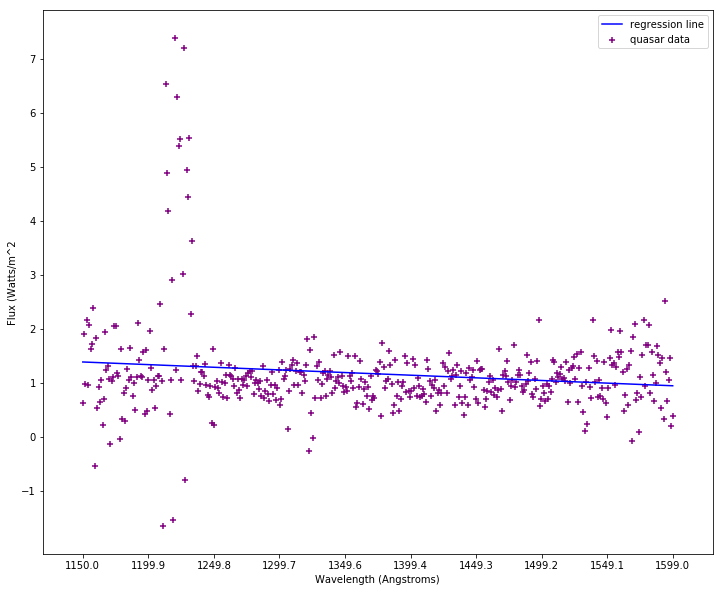

In [10]:
plt.show()

### Part ii

For the next part, we perform locally weighted linear regression on the data set with a gaussian weighting function. We use the parameters that follow.

In [11]:
import homework1_5b as hm1b
import importlib as im

In [12]:
Xtrain = X.as_matrix()
ytrain = y.as_matrix()
tau = 5

Training the model yields the following results. Here we place the results into the same plot at the data in part i. The data in the following figure shows that the weighted linear regression algorithm better fits the data, especially in the region around wavelength = ~1225 Angstroms.

In [13]:
W = hm1b.weightM(tau, Xtrain)
m = hm1b.LWLRModel(W, Xtrain, ytrain)

In [14]:
z = np.linspace(x[0], x[x.shape[0]-1], 200)
fig = plt.figure(1, figsize=(12,10))
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Watts/m^2')
plt.xticks(np.arange(x[0], x[x.shape[0]-1]+50, step=50))
plt.yticks(np.arange(-1, 9, step=0.5))
plot1 = plt.scatter(x, y, marker='+', color='black', label='quasar data')
plot2 = plt.plot(z, p(z), color='blue', label='regression line')
plot3 = plt.plot(z, m(z), color='red', label='tau = 5')
plt.legend()

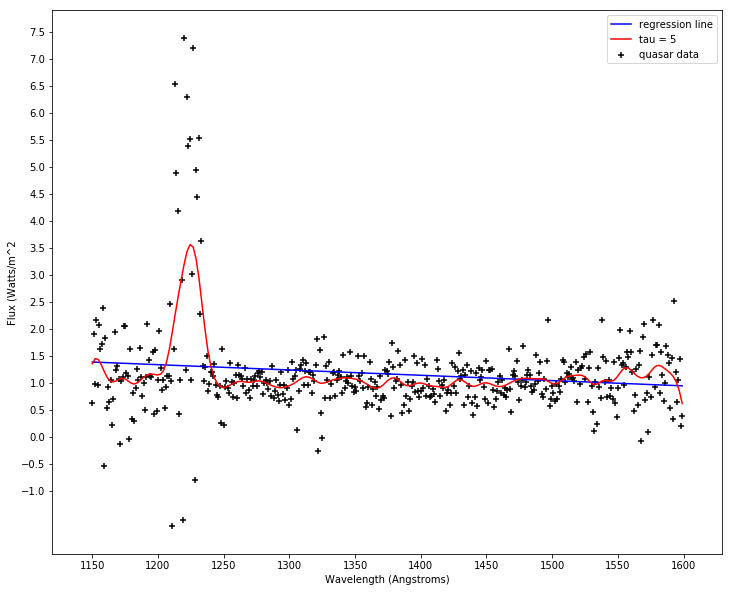

In [15]:
plt.show()

### Part III

Here we perform the same regression for more values of tau and plot the results.

In [17]:
taus = [1,5,10,100,1000]
models = {}

for tau in taus:
    W = hm1b.weightM(tau, Xtrain)
    models[tau] = hm1b.LWLRModel(W, Xtrain, ytrain)

In [ ]:
z = np.linspace(x[0], x[x.shape[0]-1], 200)
fig = plt.figure(1, figsize=(12,10))
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (Watts/m^2')
plt.xticks(np.arange(x[0], x[x.shape[0]-1]+50, step=50))
plt.yticks(np.arange(-2, 9, step=0.5))
plot1 = plt.scatter(x, y, marker='+', color='k', label='quasar data')
plot4 = plt.plot(z, models[1](z), color='red', label='tau = 1') 
plot4 = plt.plot(z, models[5](z), color='blue', label='tau = 5') 
plot5 = plt.plot(z, models[10](z), color='green', label='tau = 10') 
plot6 = plt.plot(z, models[100](z), color='magenta', label='tau = 100') 
plot7 = plt.plot(z, models[1000](z), color='cyan', label='tau = 1000') 
plt.legend()

In [ ]:
plt.show()

As tau increases, the curve flattens out and becomes more like unweighted linear regression. As tau increases, it begins overfitting the data and the variance increases.